# A First Neural Network Example

In this demo, you will learn:
* How to construct and train a simple neural network with one hidden layer using the `keras` package
* How to get the weights and intermediate layer outputs of a `keras` network after training
* How to visualize the weights 

To illustrate the concepts, we consider a simple 2D classification problem on completely synthetic data. Using synthetic data will allow us to visualize the network more easily.  We will then look at real data in later demos  

## Loading Keras

The `keras` package provides a powerful and simple platform for building and fitting neural networks.  To run `keras`, you must first install a so-called deep learning *backend*.  We suggest using [Tensorflow](https://www.tensorflow.org/install/), but `keras` can be run with other common deep learning packages including CNTK or Theano.  `Keras` is then built as a wrapper on top of these packages.  Building most neural networks in `keras` is generally much simpler than in raw Tensorflow and is perfect for getting started.  Later, if you want more flexibility, you can learn how to build models in Tensorflow directly.

After you have installed Tensorflow (or, whatever backend you are using), you will need to install keras.  This can be done via:

    pip install keras
    
at the command window.  You should then be able to load the package.

In [64]:
import keras

We also load some other common packages.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic Data 

To illustrate the neural network we generate data with some rule that will create an interesting classification region. 

In [66]:
nsamp = 400   # number of samples to generate
nx = 2        # number of dimensions of each sample

# The features are generated uniformly on the square [0,1] x [0,1]
X = np.random.uniform(0,1,(nsamp,nx))

# The class of each sample is determined by some Gaussian.  The particular function is not important.
rsq = (X[:,0]-0.5)**2 + (X[:,1]-0.5)**2
z = 10*(np.exp(-8*rsq)-0.5)
py = 1/(1+np.exp(-z))
u = np.random.uniform(0,1,nsamp)
y = (u < py).astype(int)

We create a scatter plot of the data.  You can see that it is not linearly seperable.  

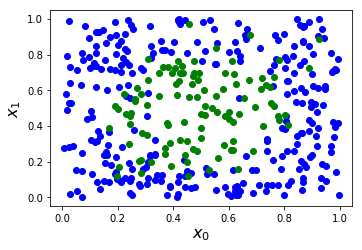

In [67]:
I0 = np.where(y==0)[0]
I1 = np.where(y==1)[0]
plt.plot(X[I0,0], X[I0,1], 'bo')
plt.plot(X[I1,0], X[I1,1], 'go')
plt.xlabel('$x_0$', fontsize=16)
plt.ylabel('$x_1$', fontsize=16)
plt.subplots_adjust(bottom=0.2, left=0.2)

## Creating a Simple Neural Network.

We see that the above points are not linearly separable.  We will see if we can build a simple neural network classifier to find a good decision region.  We first import some key sub-packages from `keras`.

In [68]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

Next, we clear the session.  This is not strictly necessary, but it is good practice as it clears any model layers that you have built before.  Otherwise, they keep hanging around.

In [69]:
import keras.backend as K
K.clear_session()

Now we create a very simple network with one hidden layer with `nh=4` hidden units.  There is `nout=1` output unit corresponding to the estimated class label.

In [70]:
nin = nx  # dimension of input data
nh = 4    # number of hidden units
nout = 1  # number of outputs = 1 since this is binary
model = Sequential()
model.add(Dense(nh, input_shape=(nx,), activation='sigmoid', name='hidden'))
model.add(Dense(1, activation='sigmoid', name='output'))

Keras provides a nice command for visualizing the layers.  

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## Training the Network

To train the network, we have to select an optimizer and a loss function.  Since this is a binary classification problem, we select the `binary_crossentropy` loss.  For the optimizer, `adam` tends to works well over a wide range of problems and is a good starting point.  We also set the `metrics` that we wish to track during the optimization.  In this case, we select `accuracy` on the training set.

In [72]:
from keras import optimizers

opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

Keras provides a simple method `fit` to run the optimization.  You simply specify the number of epochs and the batch size, both discussed in class.

In [73]:
model.fit(X, y, epochs=10, batch_size=100)

Epoch 1/10
400/400 [==============================] - 0s - loss: 0.8243 - acc: 0.2675     
Epoch 2/10
400/400 [==============================] - 0s - loss: 0.7780 - acc: 0.2675     
Epoch 3/10
400/400 [==============================] - 0s - loss: 0.7377 - acc: 0.2675     
Epoch 4/10
400/400 [==============================] - 0s - loss: 0.7016 - acc: 0.3575     
Epoch 5/10
400/400 [==============================] - 0s - loss: 0.6713 - acc: 0.7325     
Epoch 6/10
400/400 [==============================] - 0s - loss: 0.6479 - acc: 0.7325     
Epoch 7/10
400/400 [==============================] - 0s - loss: 0.6295 - acc: 0.7325     
Epoch 8/10
400/400 [==============================] - 0s - loss: 0.6125 - acc: 0.7325     
Epoch 9/10
400/400 [==============================] - 0s - loss: 0.6020 - acc: 0.7325     
Epoch 10/10
400/400 [==============================] - 0s - loss: 0.5944 - acc: 0.7325     


Unfortunately, for this problem, we need a large number of epochs -- around 1000.  We don't want to print out the progress on each epoch.  So, the code below disables the print outs by setting `verbose=0`.  Then, we run the optimization in 20 iterations with 50 epochs per iteration -- a total of 1000 epochs.  In each iteration, we use the `evaluate` method to get the loss function and accuracy and print that out manually.

In [74]:
nit = 20   # number of training iterations
nepoch_per_it = 50  # number of epochs per iterations

# Loss, accuracy and epoch per iteration
loss = np.zeros(nit)
acc = np.zeros(nit)
epoch_it = np.zeros(nit)

# Main iteration loop
for it in range(nit):
    
    # Continue the fit of the model
    init_epoch = it*nepoch_per_it
    model.fit(X, y, epochs=nepoch_per_it, batch_size=100, verbose=0)
    
    # Measure the loss and accuracy on the training data
    lossi, acci = model.evaluate(X,y, verbose=0)
    epochi = (it+1)*nepoch_per_it
    epoch_it[it] = epochi
    loss[it] = lossi
    acc[it] = acci
    print("epoch=%4d loss=%12.4e acc=%7.5f" % (epochi,lossi,acci))

epoch=  50 loss=  5.8068e-01 acc=0.73250
epoch= 100 loss=  5.8034e-01 acc=0.73250
epoch= 150 loss=  5.8020e-01 acc=0.73250
epoch= 200 loss=  5.8012e-01 acc=0.73250
epoch= 250 loss=  5.8006e-01 acc=0.73250
epoch= 300 loss=  5.7994e-01 acc=0.73250
epoch= 350 loss=  5.7974e-01 acc=0.73250
epoch= 400 loss=  5.7909e-01 acc=0.73250
epoch= 450 loss=  5.7711e-01 acc=0.73250
epoch= 500 loss=  5.7236e-01 acc=0.73250
epoch= 550 loss=  5.6362e-01 acc=0.73250
epoch= 600 loss=  5.4981e-01 acc=0.73250
epoch= 650 loss=  5.2906e-01 acc=0.73250
epoch= 700 loss=  5.0504e-01 acc=0.73250
epoch= 750 loss=  4.8877e-01 acc=0.73250
epoch= 800 loss=  4.8068e-01 acc=0.74250
epoch= 850 loss=  4.7660e-01 acc=0.72250
epoch= 900 loss=  4.7388e-01 acc=0.72750
epoch= 950 loss=  4.7091e-01 acc=0.73500
epoch=1000 loss=  4.6570e-01 acc=0.74750


We can now plot the loss function and accuracy as a function of the epoch number.  

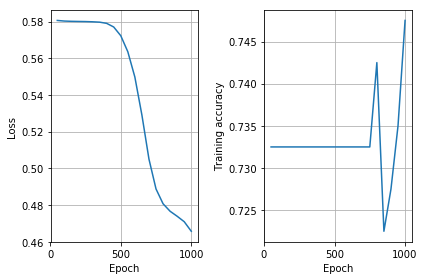

In [75]:
epoch_it = np.arange(1,nit+1)*nepoch_per_it
plt.subplot(1,2,1)
plt.plot(epoch_it, loss)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(epoch_it, acc)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.tight_layout()
plt.show()

Instead of manually measuring the loss and accuracy, we can pass a *callback* function.  This function is automatically called at each batch end.  We can then periodically print the value of the loss and accuracy.

In [76]:
class PeriodicPrintLoss(keras.callbacks.Callback):
    def __init__(self, prt_period=100):
        self.prt_period = prt_period
        
    def on_train_begin(self, logs={}):
        self.losses = []
        self.step = 0

    def on_batch_end(self, batch, logs={}):
        # Record the loss
        loss = logs.get('loss')
        self.losses.append(loss)
        
        # Print the loss periodically
        if (self.step % self.prt_period == 0):
            print('step=%6d loss=%12.4e' % (self.step, loss))
        self.step += 1
        
# Compute print period in steps 
batch_size = 100
prt_period = nepoch_per_it*int(nsamp/batch_size)

# Create the callback 
loss_cb = PeriodicPrintLoss(prt_period=prt_period)

# Run the fit with the callback
model.fit(X, y, epochs=200, batch_size=batch_size, verbose=0, callbacks=[loss_cb])

step=     0 loss=  4.5328e-01
step=   200 loss=  4.7245e-01
step=   400 loss=  4.6346e-01
step=   600 loss=  4.7291e-01


## Visualizing Decision Regions

To see how classification rule our neural network learned, we can plot the predicted class probability as a function of $(x_0,x_1)$.  To do this, we create an input matrix `Xplot` with entries that vary over $[0,1] \times [0,1]$.  We feed that into the trained network and see what the probility $P(y=1|x)$ is for each sample.  Then, we plot this like an image.

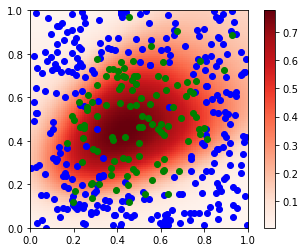

In [77]:
# Limits to plot the response.
xmin = [0,0]
xmax = [1,1]

# Use meshgrid to create the 2D input
nplot = 100
x0plot = np.linspace(xmin[0],xmax[1],nplot)
x1plot = np.linspace(xmin[0],xmax[1],nplot)
x0mat, x1mat = np.meshgrid(x0plot,x1plot)
Xplot = np.column_stack([x0mat.ravel(), x1mat.ravel()])

# Compute the output 
yplot = model.predict(Xplot)
yplot_mat = yplot[:,0].reshape((nplot, nplot))

# Plot the recovered region
plt.imshow(np.flipud(yplot_mat), extent=[xmin[0],xmax[0],xmin[0],xmax[1]], cmap=plt.cm.Reds)
plt.colorbar()

# Overlay the samples
I0 = np.where(y==0)[0]
I1 = np.where(y==1)[0]
plt.plot(X[I0,0], X[I0,1], 'bo')
plt.plot(X[I1,0], X[I1,1], 'go')

We see that the neural network is able to learn a nonlinear classification region matching the training data points.  To understand how this nonlinear region is realized it is useful to plot the response in the each of the hidden units.  To extract the output of an intermediate layer, we create a new model, `model1` with the outputs set to the hidden layer outputs and then run the `predict` command on that model.

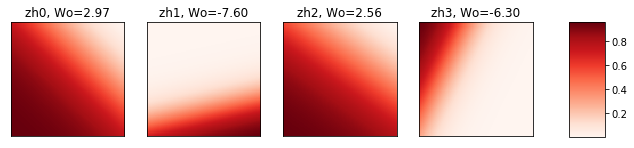

In [78]:
# Get the response in the hidden units 
layer_hid = model.get_layer('hidden')
model1 = Model(inputs=model.input,
               outputs=layer_hid.output)
zhid_plot = model1.predict(Xplot)
zhid_plot = zhid_plot.reshape((nplot,nplot,nh))

# Get the weights in the output layer
layer_out = model.get_layer('output')
Wo, bo = layer_out.get_weights()

fig = plt.figure(figsize=(10, 4))

for i in range(nh):

    plt.subplot(1,nh,i+1)
    zhid_ploti = np.flipud(zhid_plot[:,:,i])
    im = plt.imshow(zhid_ploti, extent=[xmin[0],xmax[0],xmin[0],xmax[1]], cmap=plt.cm.Reds)
    plt.xticks([])
    plt.yticks([])
    plt.title('zh{0:d}, Wo={1:4.2f}'.format(i,Wo[i,0]))

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.30, 0.05, 0.4])
fig.colorbar(im, cax=cbar_ax)

Each of the hidden units produces one linear decision region.  The final nonlinear region is then formed by taking a weighted combination of these regions.

## In-class exercise

We will now try to use a neural network to fit a simple nonlinear function.  Suppose that we are trying to learn a scalar relation:

    y = f0(x)
    
where `x` and `y` are scalars.  Suppose that the *true* function is `f0(x) = sin(2*pi*x)`, but the estimator does not know this.  We get training data as follows.

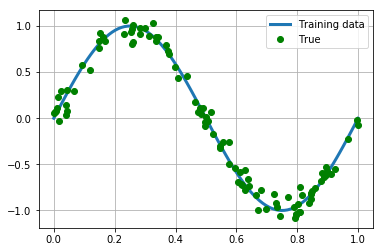

In [79]:
# Synthetic training data
nsamp = 100
xtr = np.random.rand(nsamp)
ytr = np.sin(2*np.pi*xtr) + np.random.normal(scale=0.1,size=nsamp)

# True function
nplot = 100
xp = np.linspace(0,1,nplot)
yp = np.sin(2*np.pi*xp)

# PLot
plt.plot(xp,yp,linewidth=3)
plt.plot(xtr,ytr,'go')
#plt.axis([0,1,-1.5,1.5])
plt.grid()
plt.legend(['Training data', 'True'])

Now try to have a neural network *learn* the relation `y=f(x)`.
* Clear the keras session
* Create a neural network with 4 hidden units, 1 output unit
* Use a sigmoid activation for the hidden units and no output activation
* Compile with `mean_squared_error` for the `loss` and `metrics`
* Fit the model
* Plot the predicted and true function

In [80]:
K.clear_session()
model = Sequential()
model.add(Dense(4, input_shape=(1,), activation='sigmoid', name='hidden'))
model.add(Dense(1, name='output'))

opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

model.fit(xtr, ytr, epochs=2000, batch_size=100)

Epoch 1/2000
100/100 [==============================] - 0s - loss: 1.0813 - mean_squared_error: 1.0813
Epoch 2/2000
100/100 [==============================] - 0s - loss: 1.0219 - mean_squared_error: 1.0219
Epoch 3/2000
100/100 [==============================] - 0s - loss: 0.9656 - mean_squared_error: 0.9656
Epoch 4/2000
100/100 [==============================] - 0s - loss: 0.9124 - mean_squared_error: 0.9124
Epoch 5/2000
100/100 [==============================] - 0s - loss: 0.8623 - mean_squared_error: 0.8623
Epoch 6/2000
100/100 [==============================] - 0s - loss: 0.8153 - mean_squared_error: 0.8153
Epoch 7/2000
100/100 [==============================] - 0s - loss: 0.7713 - mean_squared_error: 0.7713
Epoch 8/2000
100/100 [==============================] - 0s - loss: 0.7304 - mean_squared_error: 0.7304
Epoch 9/2000
100/100 [==============================] - 0s - loss: 0.6925 - mean_squared_error: 0.6925
Epoch 10/2000
100/100 [==============================] - 0s - loss: 0.657

100/100 [==============================] - 0s - loss: 0.3448 - mean_squared_error: 0.3448
Epoch 80/2000
100/100 [==============================] - 0s - loss: 0.3436 - mean_squared_error: 0.3436
Epoch 81/2000
100/100 [==============================] - 0s - loss: 0.3423 - mean_squared_error: 0.3423
Epoch 82/2000
100/100 [==============================] - 0s - loss: 0.3411 - mean_squared_error: 0.3411
Epoch 83/2000
100/100 [==============================] - 0s - loss: 0.3398 - mean_squared_error: 0.3398
Epoch 84/2000
100/100 [==============================] - 0s - loss: 0.3386 - mean_squared_error: 0.3386
Epoch 85/2000
100/100 [==============================] - 0s - loss: 0.3373 - mean_squared_error: 0.3373
Epoch 86/2000
100/100 [==============================] - 0s - loss: 0.3361 - mean_squared_error: 0.3361
Epoch 87/2000
100/100 [==============================] - 0s - loss: 0.3348 - mean_squared_error: 0.3348
Epoch 88/2000
100/100 [==============================] - 0s - loss: 0.3336 - m

100/100 [==============================] - 0s - loss: 0.2580 - mean_squared_error: 0.2580
Epoch 158/2000
100/100 [==============================] - 0s - loss: 0.2571 - mean_squared_error: 0.2571
Epoch 159/2000
100/100 [==============================] - 0s - loss: 0.2562 - mean_squared_error: 0.2562
Epoch 160/2000
100/100 [==============================] - 0s - loss: 0.2553 - mean_squared_error: 0.2553
Epoch 161/2000
100/100 [==============================] - 0s - loss: 0.2544 - mean_squared_error: 0.2544
Epoch 162/2000
100/100 [==============================] - 0s - loss: 0.2535 - mean_squared_error: 0.2535
Epoch 163/2000
100/100 [==============================] - 0s - loss: 0.2526 - mean_squared_error: 0.2526
Epoch 164/2000
100/100 [==============================] - 0s - loss: 0.2517 - mean_squared_error: 0.2517
Epoch 165/2000
100/100 [==============================] - 0s - loss: 0.2509 - mean_squared_error: 0.2509
Epoch 166/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.2088 - mean_squared_error: 0.2088
Epoch 236/2000
100/100 [==============================] - 0s - loss: 0.2085 - mean_squared_error: 0.2085
Epoch 237/2000
100/100 [==============================] - 0s - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 238/2000
100/100 [==============================] - 0s - loss: 0.2078 - mean_squared_error: 0.2078
Epoch 239/2000
100/100 [==============================] - 0s - loss: 0.2075 - mean_squared_error: 0.2075
Epoch 240/2000
100/100 [==============================] - 0s - loss: 0.2072 - mean_squared_error: 0.2072
Epoch 241/2000
100/100 [==============================] - 0s - loss: 0.2069 - mean_squared_error: 0.2069
Epoch 242/2000
100/100 [==============================] - 0s - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 243/2000
100/100 [==============================] - 0s - loss: 0.2063 - mean_squared_error: 0.2063
Epoch 244/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1958 - mean_squared_error: 0.1958
Epoch 314/2000
100/100 [==============================] - 0s - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 315/2000
100/100 [==============================] - 0s - loss: 0.1956 - mean_squared_error: 0.1956
Epoch 316/2000
100/100 [==============================] - 0s - loss: 0.1956 - mean_squared_error: 0.1956
Epoch 317/2000
100/100 [==============================] - 0s - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 318/2000
100/100 [==============================] - 0s - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 319/2000
100/100 [==============================] - 0s - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 320/2000
100/100 [==============================] - 0s - loss: 0.1953 - mean_squared_error: 0.1953
Epoch 321/2000
100/100 [==============================] - 0s - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 322/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1922 - mean_squared_error: 0.1922
Epoch 392/2000
100/100 [==============================] - 0s - loss: 0.1922 - mean_squared_error: 0.1922
Epoch 393/2000
100/100 [==============================] - 0s - loss: 0.1921 - mean_squared_error: 0.1921
Epoch 394/2000
100/100 [==============================] - 0s - loss: 0.1921 - mean_squared_error: 0.1921
Epoch 395/2000
100/100 [==============================] - 0s - loss: 0.1921 - mean_squared_error: 0.1921
Epoch 396/2000
100/100 [==============================] - 0s - loss: 0.1920 - mean_squared_error: 0.1920
Epoch 397/2000
100/100 [==============================] - 0s - loss: 0.1920 - mean_squared_error: 0.1920
Epoch 398/2000
100/100 [==============================] - 0s - loss: 0.1920 - mean_squared_error: 0.1920
Epoch 399/2000
100/100 [==============================] - 0s - loss: 0.1919 - mean_squared_error: 0.1919
Epoch 400/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 470/2000
100/100 [==============================] - 0s - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 471/2000
100/100 [==============================] - 0s - loss: 0.1896 - mean_squared_error: 0.1896
Epoch 472/2000
100/100 [==============================] - 0s - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 473/2000
100/100 [==============================] - 0s - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 474/2000
100/100 [==============================] - 0s - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 475/2000
100/100 [==============================] - 0s - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 476/2000
100/100 [==============================] - 0s - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 477/2000
100/100 [==============================] - 0s - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 478/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 548/2000
100/100 [==============================] - 0s - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 549/2000
100/100 [==============================] - 0s - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 550/2000
100/100 [==============================] - 0s - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 551/2000
100/100 [==============================] - 0s - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 552/2000
100/100 [==============================] - 0s - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 553/2000
100/100 [==============================] - 0s - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 554/2000
100/100 [==============================] - 0s - loss: 0.1870 - mean_squared_error: 0.1870
Epoch 555/2000
100/100 [==============================] - 0s - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 556/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1846 - mean_squared_error: 0.1846
Epoch 626/2000
100/100 [==============================] - 0s - loss: 0.1845 - mean_squared_error: 0.1845
Epoch 627/2000
100/100 [==============================] - 0s - loss: 0.1845 - mean_squared_error: 0.1845
Epoch 628/2000
100/100 [==============================] - 0s - loss: 0.1845 - mean_squared_error: 0.1845
Epoch 629/2000
100/100 [==============================] - 0s - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 630/2000
100/100 [==============================] - 0s - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 631/2000
100/100 [==============================] - 0s - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 632/2000
100/100 [==============================] - 0s - loss: 0.1843 - mean_squared_error: 0.1843
Epoch 633/2000
100/100 [==============================] - 0s - loss: 0.1843 - mean_squared_error: 0.1843
Epoch 634/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1816 - mean_squared_error: 0.1816
Epoch 704/2000
100/100 [==============================] - 0s - loss: 0.1816 - mean_squared_error: 0.1816
Epoch 705/2000
100/100 [==============================] - 0s - loss: 0.1815 - mean_squared_error: 0.1815
Epoch 706/2000
100/100 [==============================] - 0s - loss: 0.1815 - mean_squared_error: 0.1815
Epoch 707/2000
100/100 [==============================] - 0s - loss: 0.1814 - mean_squared_error: 0.1814
Epoch 708/2000
100/100 [==============================] - 0s - loss: 0.1814 - mean_squared_error: 0.1814
Epoch 709/2000
100/100 [==============================] - 0s - loss: 0.1813 - mean_squared_error: 0.1813
Epoch 710/2000
100/100 [==============================] - 0s - loss: 0.1813 - mean_squared_error: 0.1813
Epoch 711/2000
100/100 [==============================] - 0s - loss: 0.1813 - mean_squared_error: 0.1813
Epoch 712/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1780 - mean_squared_error: 0.1780
Epoch 782/2000
100/100 [==============================] - 0s - loss: 0.1780 - mean_squared_error: 0.1780
Epoch 783/2000
100/100 [==============================] - 0s - loss: 0.1779 - mean_squared_error: 0.1779
Epoch 784/2000
100/100 [==============================] - 0s - loss: 0.1779 - mean_squared_error: 0.1779
Epoch 785/2000
100/100 [==============================] - 0s - loss: 0.1778 - mean_squared_error: 0.1778
Epoch 786/2000
100/100 [==============================] - 0s - loss: 0.1778 - mean_squared_error: 0.1778
Epoch 787/2000
100/100 [==============================] - 0s - loss: 0.1777 - mean_squared_error: 0.1777
Epoch 788/2000
100/100 [==============================] - 0s - loss: 0.1777 - mean_squared_error: 0.1777
Epoch 789/2000
100/100 [==============================] - 0s - loss: 0.1776 - mean_squared_error: 0.1776
Epoch 790/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1735 - mean_squared_error: 0.1735
Epoch 860/2000
100/100 [==============================] - 0s - loss: 0.1735 - mean_squared_error: 0.1735
Epoch 861/2000
100/100 [==============================] - 0s - loss: 0.1734 - mean_squared_error: 0.1734
Epoch 862/2000
100/100 [==============================] - 0s - loss: 0.1733 - mean_squared_error: 0.1733
Epoch 863/2000
100/100 [==============================] - 0s - loss: 0.1733 - mean_squared_error: 0.1733
Epoch 864/2000
100/100 [==============================] - 0s - loss: 0.1732 - mean_squared_error: 0.1732
Epoch 865/2000
100/100 [==============================] - 0s - loss: 0.1732 - mean_squared_error: 0.1732
Epoch 866/2000
100/100 [==============================] - 0s - loss: 0.1731 - mean_squared_error: 0.1731
Epoch 867/2000
100/100 [==============================] - 0s - loss: 0.1730 - mean_squared_error: 0.1730
Epoch 868/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1679 - mean_squared_error: 0.1679
Epoch 938/2000
100/100 [==============================] - 0s - loss: 0.1678 - mean_squared_error: 0.1678
Epoch 939/2000
100/100 [==============================] - 0s - loss: 0.1677 - mean_squared_error: 0.1677
Epoch 940/2000
100/100 [==============================] - 0s - loss: 0.1676 - mean_squared_error: 0.1676
Epoch 941/2000
100/100 [==============================] - 0s - loss: 0.1676 - mean_squared_error: 0.1676
Epoch 942/2000
100/100 [==============================] - 0s - loss: 0.1675 - mean_squared_error: 0.1675
Epoch 943/2000
100/100 [==============================] - 0s - loss: 0.1674 - mean_squared_error: 0.1674
Epoch 944/2000
100/100 [==============================] - 0s - loss: 0.1673 - mean_squared_error: 0.1673
Epoch 945/2000
100/100 [==============================] - 0s - loss: 0.1672 - mean_squared_error: 0.1672
Epoch 946/2000
100/100 [==============================] - 0s - loss: 0

100/100 [==============================] - 0s - loss: 0.1606 - mean_squared_error: 0.1606
Epoch 1016/2000
100/100 [==============================] - 0s - loss: 0.1605 - mean_squared_error: 0.1605
Epoch 1017/2000
100/100 [==============================] - 0s - loss: 0.1604 - mean_squared_error: 0.1604
Epoch 1018/2000
100/100 [==============================] - 0s - loss: 0.1603 - mean_squared_error: 0.1603
Epoch 1019/2000
100/100 [==============================] - 0s - loss: 0.1602 - mean_squared_error: 0.1602
Epoch 1020/2000
100/100 [==============================] - 0s - loss: 0.1601 - mean_squared_error: 0.1601
Epoch 1021/2000
100/100 [==============================] - 0s - loss: 0.1600 - mean_squared_error: 0.1600
Epoch 1022/2000
100/100 [==============================] - 0s - loss: 0.1599 - mean_squared_error: 0.1599
Epoch 1023/2000
100/100 [==============================] - 0s - loss: 0.1598 - mean_squared_error: 0.1598
Epoch 1024/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.1514 - mean_squared_error: 0.1514
Epoch 1093/2000
100/100 [==============================] - 0s - loss: 0.1512 - mean_squared_error: 0.1512
Epoch 1094/2000
100/100 [==============================] - 0s - loss: 0.1511 - mean_squared_error: 0.1511
Epoch 1095/2000
100/100 [==============================] - 0s - loss: 0.1509 - mean_squared_error: 0.1509
Epoch 1096/2000
100/100 [==============================] - 0s - loss: 0.1508 - mean_squared_error: 0.1508
Epoch 1097/2000
100/100 [==============================] - 0s - loss: 0.1507 - mean_squared_error: 0.1507
Epoch 1098/2000
100/100 [==============================] - 0s - loss: 0.1505 - mean_squared_error: 0.1505
Epoch 1099/2000
100/100 [==============================] - 0s - loss: 0.1504 - mean_squared_error: 0.1504
Epoch 1100/2000
100/100 [==============================] - 0s - loss: 0.1503 - mean_squared_error: 0.1503
Epoch 1101/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.1394 - mean_squared_error: 0.1394
Epoch 1170/2000
100/100 [==============================] - 0s - loss: 0.1392 - mean_squared_error: 0.1392
Epoch 1171/2000
100/100 [==============================] - 0s - loss: 0.1390 - mean_squared_error: 0.1390
Epoch 1172/2000
100/100 [==============================] - 0s - loss: 0.1389 - mean_squared_error: 0.1389
Epoch 1173/2000
100/100 [==============================] - 0s - loss: 0.1387 - mean_squared_error: 0.1387
Epoch 1174/2000
100/100 [==============================] - 0s - loss: 0.1385 - mean_squared_error: 0.1385
Epoch 1175/2000
100/100 [==============================] - 0s - loss: 0.1383 - mean_squared_error: 0.1383
Epoch 1176/2000
100/100 [==============================] - 0s - loss: 0.1381 - mean_squared_error: 0.1381
Epoch 1177/2000
100/100 [==============================] - 0s - loss: 0.1380 - mean_squared_error: 0.1380
Epoch 1178/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.1241 - mean_squared_error: 0.1241
Epoch 1247/2000
100/100 [==============================] - 0s - loss: 0.1239 - mean_squared_error: 0.1239
Epoch 1248/2000
100/100 [==============================] - 0s - loss: 0.1237 - mean_squared_error: 0.1237
Epoch 1249/2000
100/100 [==============================] - 0s - loss: 0.1234 - mean_squared_error: 0.1234
Epoch 1250/2000
100/100 [==============================] - 0s - loss: 0.1232 - mean_squared_error: 0.1232
Epoch 1251/2000
100/100 [==============================] - 0s - loss: 0.1230 - mean_squared_error: 0.1230
Epoch 1252/2000
100/100 [==============================] - 0s - loss: 0.1228 - mean_squared_error: 0.1228
Epoch 1253/2000
100/100 [==============================] - 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 1254/2000
100/100 [==============================] - 0s - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 1255/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 1324/2000
100/100 [==============================] - 0s - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 1325/2000
100/100 [==============================] - 0s - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 1326/2000
100/100 [==============================] - 0s - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 1327/2000
100/100 [==============================] - 0s - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 1328/2000
100/100 [==============================] - 0s - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 1329/2000
100/100 [==============================] - 0s - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 1330/2000
100/100 [==============================] - 0s - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 1331/2000
100/100 [==============================] - 0s - loss: 0.1032 - mean_squared_error: 0.1032
Epoch 1332/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 1401/2000
100/100 [==============================] - 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 1402/2000
100/100 [==============================] - 0s - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 1403/2000
100/100 [==============================] - 0s - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 1404/2000
100/100 [==============================] - 0s - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 1405/2000
100/100 [==============================] - 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 1406/2000
100/100 [==============================] - 0s - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 1407/2000
100/100 [==============================] - 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 1408/2000
100/100 [==============================] - 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 1409/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0630 - mean_squared_error: 0.0630
Epoch 1478/2000
100/100 [==============================] - 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 1479/2000
100/100 [==============================] - 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 1480/2000
100/100 [==============================] - 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 1481/2000
100/100 [==============================] - 0s - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 1482/2000
100/100 [==============================] - 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 1483/2000
100/100 [==============================] - 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 1484/2000
100/100 [==============================] - 0s - loss: 0.0613 - mean_squared_error: 0.0613
Epoch 1485/2000
100/100 [==============================] - 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 1486/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 1555/2000
100/100 [==============================] - 0s - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 1556/2000
100/100 [==============================] - 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 1557/2000
100/100 [==============================] - 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 1558/2000
100/100 [==============================] - 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 1559/2000
100/100 [==============================] - 0s - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 1560/2000
100/100 [==============================] - 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 1561/2000
100/100 [==============================] - 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 1562/2000
100/100 [==============================] - 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 1563/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 1632/2000
100/100 [==============================] - 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 1633/2000
100/100 [==============================] - 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 1634/2000
100/100 [==============================] - 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 1635/2000
100/100 [==============================] - 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 1636/2000
100/100 [==============================] - 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 1637/2000
100/100 [==============================] - 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 1638/2000
100/100 [==============================] - 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 1639/2000
100/100 [==============================] - 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 1640/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 1709/2000
100/100 [==============================] - 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 1710/2000
100/100 [==============================] - 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 1711/2000
100/100 [==============================] - 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 1712/2000
100/100 [==============================] - 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 1713/2000
100/100 [==============================] - 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 1714/2000
100/100 [==============================] - 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 1715/2000
100/100 [==============================] - 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 1716/2000
100/100 [==============================] - 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 1717/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 1786/2000
100/100 [==============================] - 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 1787/2000
100/100 [==============================] - 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 1788/2000
100/100 [==============================] - 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 1789/2000
100/100 [==============================] - 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 1790/2000
100/100 [==============================] - 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 1791/2000
100/100 [==============================] - 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 1792/2000
100/100 [==============================] - 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 1793/2000
100/100 [==============================] - 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 1794/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 1863/2000
100/100 [==============================] - 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 1864/2000
100/100 [==============================] - 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 1865/2000
100/100 [==============================] - 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 1866/2000
100/100 [==============================] - 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 1867/2000
100/100 [==============================] - 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 1868/2000
100/100 [==============================] - 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 1869/2000
100/100 [==============================] - 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 1870/2000
100/100 [==============================] - 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 1871/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 1940/2000
100/100 [==============================] - 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 1941/2000
100/100 [==============================] - 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 1942/2000
100/100 [==============================] - 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 1943/2000
100/100 [==============================] - 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 1944/2000
100/100 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 1945/2000
100/100 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 1946/2000
100/100 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 1947/2000
100/100 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 1948/2000
100/100 [==============================] - 0s 

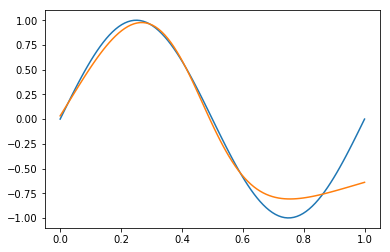

In [81]:
# Synthetic training data
y = model.predict(xp)
plt.plot(xp,yp)
plt.plot(xp,y)